[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eirasf/GCED-AA3/blob/main/lab2/lab2.ipynb)

# Selección de Variables (Feature Selection)

En está práctica se va a explorar la segunda de las variantes para acometer la maldición de las dimensionalidades introducida en la práctica anterior. Si bien, como se vio en la lección destinada a la reducción de la dimensionalidad, se pueden transformar las variables a un nuevo espacio de menor dimensionalidad; existe la posibilidad de que no toda la información sea realmente útil. Ese proceso se puede apreciar en la siguiente figura en la que solo una parte de los datos son datos realmente útiles y, el resto, se traduce en ruido para cualquier tipo de aproximación basada en aprendizaje automático.

![](./Images/P2/Feature-Selection.png)

Por lo tanto,lo que se va a intentar es reducir el ruido intrinseco en los problemas. La fuente de este ruido puede ser diverso como: a datos no relacionados, variables con información redundante o variables correlacionadas o covariadas. 

Este proceso a veces se debe de hacer de manera semimanual, por ejemplo, imagínese que el _dataset_ tiene registrados los minutos y segundos de la duración de un evento en dos columnas diferentes dentro de un dataset tipo `pandas`. Es evidente que se pueden fusionar ambos datos en una única columna representando los minutos como segundos. Este proceso manual, si bien en muchos casos puede suponer una gran diferencia, es inabordable de manera automática ya que implica un conocimiento experto del problema. A mayores, en la mayoría de los casos actuales en donde el número de variables se cuenta por centenares o miles en muchos casos, este procedimiento manual no es factible hacerlo en un tiempo razonable salvo para casos triviales o muy conocidos. Es por ello que las técnicas de selección automática de variables cobran una especial relevancia para acometer este problema de alta dimensionalidad.

Desde un punto de vista meramente organizativo, las técnicas de selección de varibles se clasifican habitualmente atendiendo a dos criterios principales cada uno de los cuales se puede ver en la figura siguiente:

![](./Images/P2/feature-selection-models.png)

En un primer nivel estarían los modelos no supervisados, que serían aquellos que realizan realizan un procedimiento de _clustering_ sin necesidad de que el conjunto este etiquetado. Por otro lado, estarían todos los modelos supervisados, que se corresponde con aquellos en los que la selección de variables se hace en función del rendimiento de un clasificador en el que la salida debe de ser conocida. Este segundo conjunto de técnicas de selección de variables, a su vez, se dividen en tres grandes posibles aproximaciones referenciadas, habitualmente, por sus terminos en inglés, siendo estos _filtered_, _wrappered_ y _embedded_. En los siguientes apartados se abordarán cada una de estas tres posibles aproximaciones y detallaran algunos de los métodos más habituales que se encuadran en cada una de ellas. 

## _Filtered_
Los métodos de _filtered_ o de filtrado se utilizan en el paso de preprocesado del conjunto de datos. Es decir, son previos al uso de las variables en cualquier tipo algoritmo de aprendizaje automático. Por tanto, su comportamiento es independiente de que tipo de algoritmo vaya a ser utilizado _a posteriori_. 

Atendiendo al coste computacional, se trata de algorimos que se puden calificar como "baratos" ya que su ejecución es rápida y requieren pocos recursos en terminos generales. Su principal función, es la detección y eleminación de características duplicadas, correlacionadas y redundantes. Sin embargo, debe destacarse que, este tipo de metodos, no son capaces de detectar y eliminar el ruido correspondiente a la multicolinealidad. Es decir, en este tipo de métodos, la selección de características se evalúa individualmente, lo que  puede ayudar cuando las características están aisladas (no tienen dependencia de otras características), pero tendrá un rendimiento muy penalizado cuando se usa una combinación de características como entrada, lo que podría aumentar el rendimiento global del modelo.

![](./Images/P2/filter-method.png)

Algunas de las técnicas más utilizadas son: 

* Ganancia de información (_Information Gain_). Definida como la cantidad de información proporcionada por la variable para identificar el valor objetivo. En este caso se medirá la reducción de los valores de entropía y, por consiguiente, la ganancia de información aportada por cada variable teniendo la mencionada variable objetivo como referencia. 
* Test Chi-cuadrado. El método chi-cuadrado ($\chi^2$) se utiliza generalmente para probar la relación entre variables categóricas. Compara los valores observados de diferentes atributos del conjunto de datos con su valor esperado.
* _Fishher's Score_. El coeficiente de Fisher selecciona cada característica de forma independiente de acuerdo con sus puntuaciones según el criterio de Fisher, lo que da lugar a un conjunto subóptimo de características. Cuanto mayor es la puntuación de Fisher, mejor es la característica seleccionada.
* Coeficiente de correlación. El coeficiente de correlación de Pearson es una medida que cuantifica la asociación entre dos variables continuas y la dirección de la relación con sus valores que van de -1 a 1.
* Coefiente de correlación $\tau$ de Kendall. Al igual que en el caso anterior, es un coefiente que mede la correlación entre pares de variables con la salvedad de que se aplica a rangos. Mide la similitud entre en la ordenación de los datos que se clasifican en rangos.
* Coefiente de Correlación de Spearman ($\rho$). Otro método que mide la similitud en base a la correlación de series de datos aleatrios. En este método se tiene en cuenta el orden en el que se presentan los datos para el calculo de la diferencia entre ellos. Se puede usar tanto con datos categóricos como continuos.
* Umbral de varianza. Es un método en el que se eliminan todas las características cuya varianza no alcanza el umbral específico. Por defecto, este método elimina las características que tienen una varianza cero. La suposición que se hace con este método es que las características de mayor varianza probablemente contengan más información y sean más explicativas.
* Diferencia Media Absoluta (_Mean Absolute Difference, MAD_). Este método es similar al método del umbral de varianza pero la diferencia es que no hay un cuadrado en MAD. Este método calcula la diferencia media absoluta del valor medio.
* Ratio de Dispersión. El ratio de dispersión se define como la relación entre la media aritmética (AM) y la media geométrica (GM) de una característica determinada. Su valor oscila entre +1 y ∞ ya que AM ≥ GM para una característica determinada. Una relación de dispersión más alta implica un rasgo más relevante.
* Dependencia mutua.  Este método mide si dos variables son mutuamente dependientes y, por tanto, proporciona la cantidad de información que se obtiene para una variable al observar la otra. En función de la presencia/ausencia de un rasgo, mide la cantidad de información que ese rasgo contribuye a realizar la predicción objetivo.
* Alivio (Relief). Este método mide la calidad de los atributos mediante el muestreo aleatorio de una instancia del conjunto de datos. A partir de este punto el método selecciona dos instancias a mayores, las dos más cercanas a la seleccionada para cada una de las clases del conjunto a clasificar. El metodo basándose en la diferencia entre las carácterísticas de la instancia seleccionada y dos instancias más cercanas determina para cada característica su importtancia en el grado de similitud.


Para determinar cual de las técnicas aplicar, un punto esencial es determinar el tipo de variables de entrada y salida del problema que se está abordando. En el siguiente gráfico se puede ver la sugerencia segun estos tipos si son variables numéricas o bien categóricas. 

![](./Images/P2/Filtered_Methods_Selection.png)

Así en función del tipo de problema tendríamos:

* Entrada Numérica, Salida Numérica y correlación lineal: Método de Pearson ($R^2$). 
* Entrada Numérica, Salida Numérica y correlación NO lineal: Método de Spearman
* Entrada Numérica, Salida Categórica y correlación lineal: ANOVA (Análisis de la varianza). 
* Entrada Numérica, Salida Categórica y correlación NO lineal: Método de Kendall
* Entrada Categórica, Salida Numérica y correlación lineal: Método de Kendall 
* Entrada Categórica, Salida Numérica y correlación NO lineal: ANOVA (Análisis de la varianza)
* Entrada Categórica, Salida Numérica: $\chi^2$ ó Información Mutua

Como nota, comentar que los problemas con entrada categórica y salida numérica son terriblemente raros. Además en la propuesta nótese que el método de Kendall asume que las categorías son ordinales, es decir, que las podemos ordenar y numerar.
En cuanto a la implementación en Python de estos métodos se puede hacer uso tanto de la librería `scikit learn` como, en ocasiones, de `scipy`. Específicamente a continuación se muestra un resumen de las implementaciones de estas funciones:

- Pearson’s Correlation Coefficient: [sklearn.feature_selection.f_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html)
- Spearman’s rank correlation: [scipy.stats.spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)
- ANOVA: [sklearn.feature_selection.f_classif()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html)
- Kendall’s tau: [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kendalltau.html)
- Chi-Squared: [sklearn.feature_selection.chi2()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)
- Mutual Information: [sklearn.feature_selection.mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) y [sklearn.feature_selection.mutual_info_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html)

Para la selección se puede hacer uso de las funciones [sklearn.feature_selection.SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) y [sklearn.feature_selection.SelectPercentil](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html).Véase a continuación un ejemplo de aplicación.


Problema de Regresión:(500, 100) - > :(500, 10)


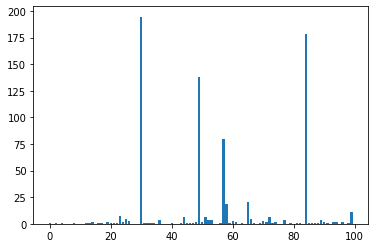

Problema de Clasificación:(100, 30) - > :(100, 2)


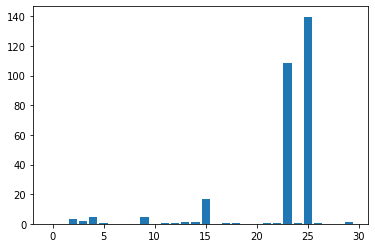

In [21]:
from sklearn.datasets import make_regression, make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif

from matplotlib import pyplot

def plot_scores(feature_filter):
    '''
        Función de utilidad para pintar los scores de los diferentes filtros
    '''
    pyplot.bar([i for i in range(len(feature_filter.scores_))], feature_filter.scores_)
    pyplot.show()

# Ejemplo con Entrada Numérica y Salida Numérica (Regresión)
# Generar el dataset
X, y = make_regression(n_samples=500, n_features=100, n_informative=10)
# Definir el filtro ( Pearson)
Pearson_filter = SelectKBest(score_func=f_regression, k=10)
# Aplicarlo
X_filtered = Pearson_filter.fit_transform(X, y)
print(f'Problema de Regresión:{X.shape} - > :{X_filtered.shape}')
plot_scores(Pearson_filter)

# Ejemplo con Entrada Numérica y Salida Categorica (Clasificación)
# Generar el dataset
X, y = make_classification(n_samples=100, n_features=30, n_informative=2)
# Definir el filtro (ANOVA)
ANOVA_filter = SelectKBest(score_func=f_classif, k=2)
# Aplicarlo
X_filtered = ANOVA_filter.fit_transform(X, y)
print(f'Problema de Clasificación:{X.shape} - > :{X_filtered.shape}')
plot_scores(ANOVA_filter)

Problema de Clasificación (CHi2):(569, 30) - > :(569, 10)


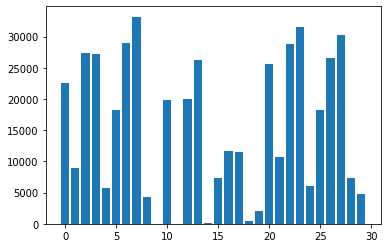

Problema de Clasificación (MI):(569, 30) - > :(569, 10)


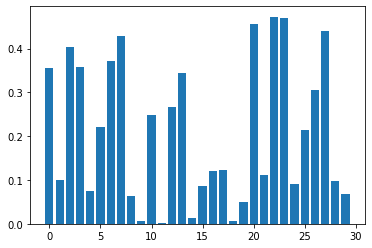

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2, mutual_info_classif

#Entrada y Salida Categoricas
# Preparar el dataset a ser usado, es decir, convertir en datos categóricos 
dataset = load_breast_cancer()
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(dataset.data)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataset.target)

# Proceder a definir el filtro
chi2_filter = SelectKBest(score_func=chi2, k=10)
# Aplicarlo
X_filtered = chi2_filter.fit_transform(X, y)
print(f'Problema de Clasificación (CHi2):{X.shape} - > :{X_filtered.shape}')
plot_scores(chi2_filter)

# Proceder a definir el filtro
mutual_information_filter = SelectKBest(score_func=mutual_info_classif, k=10)
# Aplicarlo
X_filtered = mutual_information_filter.fit_transform(X, y)
print(f'Problema de Clasificación (MI):{X.shape} - > :{X_filtered.shape}')
plot_scores(mutual_information_filter)

Como puede ver sobre estas líneas se han aplicado diferentes aproximaciones según el tipo de problema y en las figuras asociadas podemos ver el valor alcanzado por cada uno de los filtros para cada problema. Un punto importante es que, siempre que vayan a ser utilizados para procesos de _machine learning_, es necesario definir el filtro sólo sobre los datos de entrenamiento y posteriormente aplicarselo a los datos de test.  El objetivo es  no contaminar el entrenamiento con información del test. 

### Ejercicio
Se propone sobre el mismo problema (_breast cancer_) y aplicar las mismas técnicas de filtrado pero, esta vez, se realizará una división entre conjunto de entrenamiento y test con unas proporciones (90:10). Una vez hecha esta división, realizar el entrenamiento de un modelo KNN conlos datos originales y comprobar el test. A continuación,  definir los filtrados y aplicarlos. Nuevamente entrene un KNN con estos datos filtrados para cada una de los tipos y compruebe la diferencia entre ambos en tiempo sobre el conjunto de entrenamiento y es ajuste sobre el conjunto de test. 

In [ ]:
# Cargar la base de datos
#TODO

# Realizar la división
#TODO


In [26]:
%%timeit -n 10

#Realizar el entrenamiento del KNN con los datos originales
#TODO

In [ ]:
# Realizar el test del modelo resultante
#TODO

In [ ]:
#Definir los filtros y aplicarlos
#TODO

In [25]:
%%timeit -n 10

#Realizar el entrenamiento del KNN con los datos filtrados
#TODO


In [ ]:
#Realizar el test del modelo resultante
#TODO

## Wrapped

Los métodos _wrapped_, también denominados algoritmos _eager_, entrenan el algoritmo utilizando un subconjunto de características de forma iterativa. Basándose en las conclusiones obtenidas en el entrenamiento previo del modelo, se añaden y/o eliminan características. El o los criterios de parada para seleccionar el mejor subconjunto suelen estar predefinidos por la persona que entrena el modelo. Por ejemplo, algunas posibilidades serían cuando el rendimiento del modelo disminuye, se ha alcanzado un número específico de características, o se han realizado un número de iteraciones. Como principal ventaja de estos métodos sobre los de filtrado se puede esgrimir el hecho de que proporcionan un conjunto más óptimo de características para el entrenamiento del modelo. Esto último tiene como resultados que los modelos exhiben habitualmente una mayor precisión que los modelos entrenados tras la aplicación de los métodos de filtrado, si bien, evidentemente, son computacionalmente más caros.

![](./Images/P2/wrapper-method.png)

Algunas de las técnicas que se puden encuadrar en este punto serían:

* Selección hacia delante (_Forward Selection_). Este método es un enfoque iterativo en el que inicialmente se comienza con un conjunto vacío de características y se sigue añadiendo una característica que mejore nuestro modelo después de cada iteración. El criterio de parada es hasta que la adición de una nueva variable no mejora el rendimiento del modelo.
* Eliminación hacia atrás (_Backward Elimination_). Este método también es un enfoque iterativo en el que inicialmente empezamos con todas las características y después de cada iteración, eliminamos la característica menos significativa. El criterio de parada es hasta que no se observa ninguna mejora en el rendimiento del modelo después de eliminar la característica.
* Eliminación bidireccional (_Bi-directional Elimination_). Este método utiliza simultáneamente la técnica de selección hacia delante y la de eliminación hacia atrás para llegar a una única solución.
* Selección exhaustiva (_Exhastive Selection_). Se considera un enfoque de fuerza bruta para la evaluación de subconjuntos de características. Crea todos los subconjuntos posibles y construye un algoritmo de aprendizaje para cada subconjunto y selecciona el subconjunto cuyo rendimiento del modelo es mejor.
* Eliminación recursiva (_Recursive Feature Elimination_, RFE).Un método de optimización _eager_, el cual selecciona las características considerando recursivamente el conjunto más pequeño de características. El estimador se entrena con un conjunto inicial de características y se obtiene su importancia mediante la aportación a la solución. A continuación, se eliminan las características menos importantes del conjunto actual de características hasta que nos quedemos con el número necesario de características.

Este último es sin lugar a dudas el método más aplicado dentro de este subconjunto. Fue propuesto originalmente por Guyon para los modelos _SVM_, pero tiene aplicación con cualquier algoritmo que calcule la importancia de las variables.De hecho en  `scikit learn`_ se puede hacer uso de la función correspondiente para poder acometer su uso. En el siguiente ejemplo se puede ver un ejemplo de como usar el algoritmo RFE sobre el mismo problema que se había definido en el apartado anterior.

In [31]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

dataset = load_breast_cancer()
model = LogisticRegression(n_jobs=-1)

rfe = RFE(model, n_features_to_select=3, verbose=3)
rfe = rfe.fit(dataset.data, dataset.target)

print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)

Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Num Features: 3
Selected Features:

Como se puede ver, el algoritmo ordena por importancia las diferentes características que lo componen. Así mismo se puede extraer una lista de las características seleccionadas. En el código siguiente se pueden ver las características con el valor de importancia asociado al correcto diagnóstico y como imprimir el nombre asociaciado en este caso a las mencionadas variables. El valor asociado es el resultado de la normalización entre 0 y 1 de las posiciones en el raking de las variables, siendo las seleccionadas aquellas con un valor de 1.

In [32]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

ranking(list(map(float, rfe.ranking_)), dataset.feature_names,order=-1)

{'mean radius': 0.89,
 'mean texture': 0.33,
 'mean perimeter': 0.22,
 'mean area': 0.07,
 'mean smoothness': 0.37,
 'mean compactness': 0.74,
 'mean concavity': 1.0,
 'mean concave points': 0.78,
 'mean symmetry': 0.44,
 'mean fractal dimension': 0.11,
 'radius error': 0.63,
 'texture error': 0.81,
 'perimeter error': 0.59,
 'area error': 0.67,
 'smoothness error': 0.0,
 'compactness error': 0.52,
 'concavity error': 0.3,
 'concave points error': 0.19,
 'symmetry error': 0.15,
 'fractal dimension error': 0.04,
 'worst radius': 0.41,
 'worst texture': 0.7,
 'worst perimeter': 0.56,
 'worst area': 0.26,
 'worst smoothness': 0.85,
 'worst compactness': 0.96,
 'worst concavity': 1.0,
 'worst concave points': 1.0,
 'worst symmetry': 0.93,
 'worst fractal dimension': 0.48}

Un punto importante a resaltar es el hecho de que cualquiera de los métodos de selección de variables ya sean _filtered_, _wrapped_ o _embedded_ de cualquier tipo no tiene que limitarse a esquemas _hold out_ como el del apartado anterior. Al igual que en otras aproximaciones se pueden usar diferentes aproximaciones de _Cross-validation_. Un ejemplo puede verse a continuación con el mismo problema que el anterior pero esta vez con un _Statified 10-fold cross-validation_.

Número óptimo de variables: 26
Número total de variables: 569


'00:00:03'

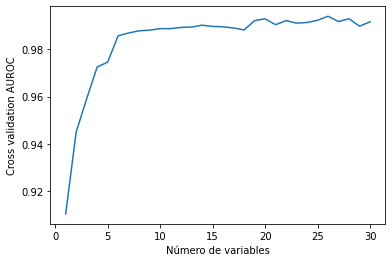

In [ ]:
from  matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
    
import time
start_time = time.time()

model = LogisticRegression(n_jobs=-1)

rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(n_splits=10),
              scoring='roc_auc',n_jobs=-1)
rfecv.fit(dataset.data, dataset.target)

print(f'Número óptimo de variables: {rfecv.n_features_}')
print(f'Número total de variables: {len(dataset.target)}')

pyplot.xlabel("Número de variables")
pyplot.ylabel("Cross validation AUROC")
#pyplot.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
pyplot.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

En el gráfico se puede ver como el sistema mejora a medida que se van introduciendo nuevas variables hasta que la cuenta llega a 26, es decir, para este modelo concreto las últimas 4 no poseen prácticamente información.

### Ejercicicio1
Compare los resultados cambiando el modelo con el que se compara, por ejemplo usando como base un _Decisión Tree_, un _SVM_ y un _LogisticRegression_. Que diferencias aprecia en cuanto a tiempos y número de variables. 

` Escriba aquí su respuesta razonada`


### Ejercicio 2
El otro elemento que no se ha variado es el tipo de _Cross-Validation_. Fijado el modelo en la técnica seleccionada con anterioridad, compruebe como cambia el comportamiento al cambiar el tipo de _cross-validation_ o la cantidad de _folds_. Por ello, cambie el _cross-validation stratified_ por una la versión sin estratificación y, adicionalmente, una estrategia _leave-one-out_, está última se puede implementar con la función `KFold` o la clase de `scikit-learn`. 

In [ ]:
#Repetir el experimento con un cross-validation sin estratificación


#Implementar y repetir el ejercicio con una estrategia leave-one-out



¿Qué diferencias se aprecian entre las tres aproximaciones? ¿Sería conveniente el usar un Repeated KFold? Razone su respuesta


` Escriba aquí su respuesta razonada`


## Embedded

En los métodos embebidos, el algoritmo de selección de características se integra como parte del algoritmo de aprendizaje. Por lo tanto, este tiene sus propios mecanísmos para la selección de características incorporado en su funcionamiento normal. El objetivo principal de estos métodos es dar respuesta a los inconvenientes de los métodos _filtered_ y _wrapped_, mientras mantienen sus ventajas. Comparativamente estos métodos son más rápidos que los metodos _filtered_ mientras que son más precisos. Además a diferencia que estos últimos, también tienen en cuenta una combinación de características.


![](./Images/P2/embedded.png)

Algunas técnicas utilizadas son

* Regularización. Más que un método es un conjunto de técnicas que busca añadir una penalización a diferentes parámetros del modelo de aprendizaje automático para evitar el sobreajuste del modelo. Entre otras técnicas, tres muy utilizadas son las conocidas como _Lasso_ (o regularización L1), _Ridge_(o Regularización L2) o _ElasticNet_ (regularización L1 y L2). La regurarización L1 se utiliza cuandos se sospecha que hay características irrelievantes, mientras que la L2 se utiliza para la detección de elementos correlados. Independientemente del tipo de penalización, esta se le aplica a los coeficientes que regulan el uso de cada una de las caracterísitcas en el modelo, y pudiendo, por tanto, reducir algunos coeficientes a cero. Este último hecho permitiría eliminar aquelles características con coeficiente cero o muy bajo ya que no tendrían influencia en el modelo. A continiación a modo de recordatorio se muestra la formulación matemática de cada una de estas regularizaciones. En las fórmulas sivuinetes asuma $N$ como el número de características, $c_i$ es cada uno de los coeficientes de dichas caracterísitcas y $\alpha$ un parámetro de ponderación entre uno y el otro tipo de normalización.
$$ L1 = \frac{1}{N}*\sum_{n=1}^N |c_i|
\qquad 
L2 = \frac{1}{2N}*\sum_{n=1}^N c_i ^2
\qquad
ElasticNet = \alpha*L1 + (1-\alpha)*L2$$
* Métodos basados en el árboles. Otro conjunto de técnicas como pueden ser _Random Forest_ o _Gradient Boosting_. Estas técnicas utilizan un valor que ofrecen un valor de la importancia de las características que nos servirá para la selección. Por tanto, dicho valor nos indica qué características son más importantes para influir en la característica objetivo. En ambos casos, esa importancia se utiliza para la división del espacio de búsqueda por parte de los árboles.

De entre las mencionadas anteriormente las de regularización son las menos usadas y a día de hoy es raro ver alguna aproximación en el sentido fuera de su aplicaión en las redes de neuronas artificiales. Por contra, el uso de los árboles de decisión y, por extensión, de los _Random Forest_ se encuentran entre los métodos más utilizados para la reducciónd e variables. Vease el siguiente ejemplo en el que se extrae la importancia que le otorga un clasificador `ExtraTrees` de la librería `scikit-learn` que crea un conjunto de arboles aleatorios sobre subconjuntos de patrones.
 

<BarContainer object of 30 artists>

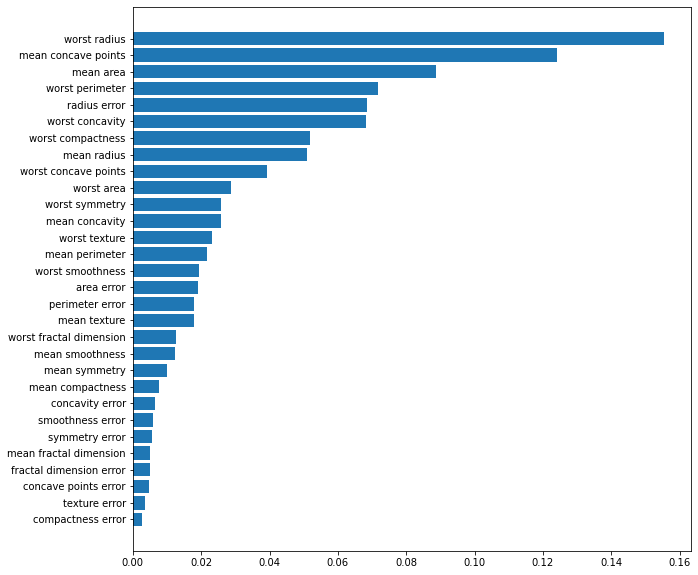

In [71]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot
# load data
dataset = load_breast_cancer()

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(dataset.data, dataset.target)
res = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), dataset.feature_names), reverse=False)
(values, names) = zip(*res)

pyplot.rcParams['figure.figsize'] = [10, 10]
pyplot.barh(names, values)

Como se puede ver en este gráfico no todas las caracterísitcas tienen la misma consideración en cuanto a su importancia en la clasificación y este valor puede usarse para seleccionar aquellas más importantes.

### Ejercicio
Repita este procedimiento de extracción de la importancia de las características pero esta vez usando como base los RandomForest y variando el número de estimadores a 10, 50, 100 y 500. ¿Qué diferencias observa?

Escriba su respuesta razonada aquí

A mayores una cosa que se puede hacer es combinar este proceso con otros procedimientos como el RFE, donde el estimador sea una de estas técnicas. Pruebe a hacer este cambio sobre el ejemplo anterior de RFE pero con los RandomForest como estimador. Comente brevemente las diferencias

Escriba aquí su respuesta razonada

### Ejercicio 

Cabe destacar que no solo se puede aplicar la seleción de variables. Con posterioridad a está, se podría aplicar una técnica de reducción de la dimensionalidad. Haga un pequeño estudio usando un SVM y la base de datos MNIST. Realice las siguiente implementaciones:

In [ ]:

# Entrenar un SVM con la entrada tal cual

# Realizar una Selección de Características y posteriormente entrenar otro SVM

# Realizar Aplicar PCA y entrenar un tercer SVM

# Realizar la selección de carácterísticas, aplicarle a esa PCA y finalmente entrenar un SVM

# Comparar los resultados en test.


## Pipelines

Si bien no es un elemento propiamente de la asignatura, cabe destacar que `scikit-learn` cuenta con una clase de utilidad `Pipeline`que nos permite definir conjuntos de operaciones que se van a ejecutar sobre el conjunto de datos pertinente. Es decir, se comportarían de la misma manera que un modelo de classificación o una transformación, sólo que se aplicarían un conjunto de operaciones de manera secuencial.

Véase el siguiente ejemplo para intuir la potencia de esta aproximación:


/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear fail

/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/quique/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear fail

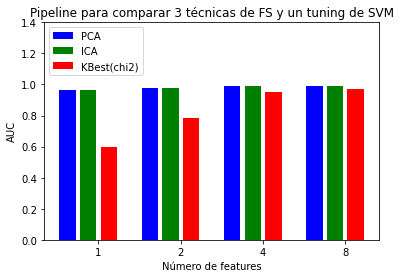

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import FastICA


#Cargar los datos
dataset_breast = load_breast_cancer()

# Definición de un Pipeline con los dos estadios
pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LinearSVC())
])

# Opciones y técnicas a probar
N_FEATURES_OPTIONS = [1, 2, 4, 8,]
C_OPTIONS = [128,512]
param_grid = [ 
    {
        'reduce_dim': [PCA(), FastICA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA','ICA', 'KBest(chi2)']

# Buscar los mejores parámetros para un 5 cross-validation
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid,scoring='roc_auc')
grid.fit(dataset_breast.data, dataset_breast.target)

# Sacar las medias en test
mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
mean_scores = mean_scores.max(axis=0)
# Opción meramente cosmética para que las barras salgan centradas
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

# Crear el gráfico
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Pipeline para comparar 3 técnicas de Reducción sobre unSVM")
plt.xlabel('Número de features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('AUC')
plt.ylim((0, 1.4))
plt.legend(loc='upper left')
plt.show()

Así podemos ver como dentro de un *cross-validation* o una función de búsqueda como el `GrisSearch` nos permite tratar al conjunto de técnicas como un único elemento. A mayores, otro de los puntos interesantes es como se puede ver en la llamada de este código a GridSearch, en muchas ocasiones las ejecuciones se pueden paralelizar, reduciendo el tiempo necesario para su ejecución.

Por último, destacar que ya que podemos definir nuestros propios `Tranformers`, `Classifiers` o `Regressors`, siempre que estos cumplan la firma de los métodos de `scikit-learn`estos se pueden integrar dentro de uno de estos pipelines para su ejecuci